# Challenge: Rearrange Sorted List in Max/Min Form

**Statement**:
* We're given a sorted list, `nums`, containing positive integers only. 
* We have to rearrange the list so that when returned, the `0th` index of the list will have the largest number, the `1st` index will have the smallest number, the `2nd` index will have the second largest number, the `3rd` index will have the second smallest number, and so on.
* In the end, we’ll have the largest remaining numbers in descending order and the smallest in ascending order at even and odd positions, respectively.

**Constraints**:

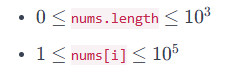

# Examples

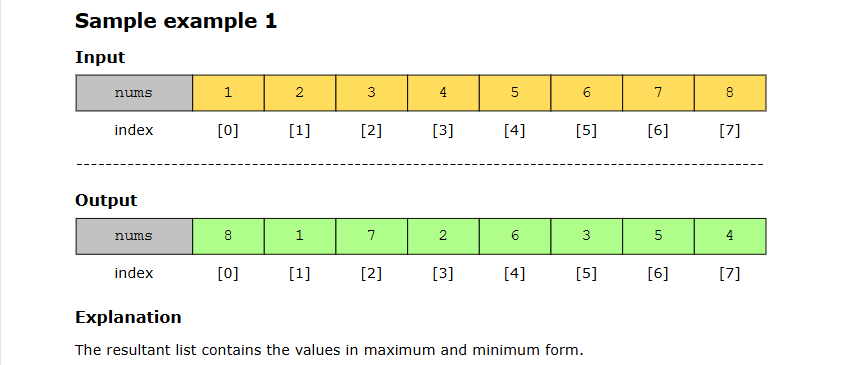

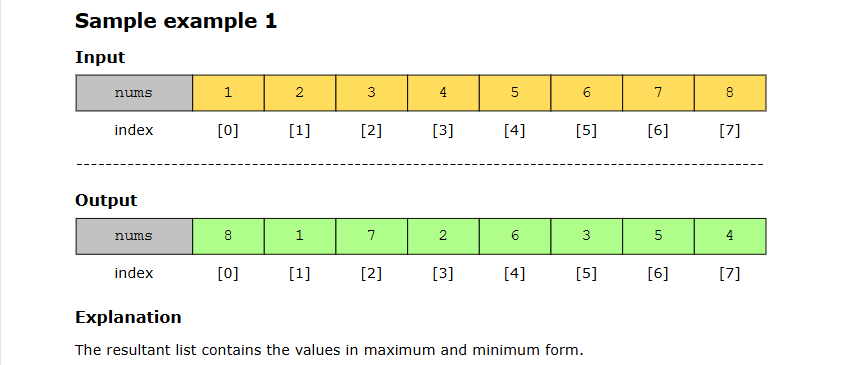

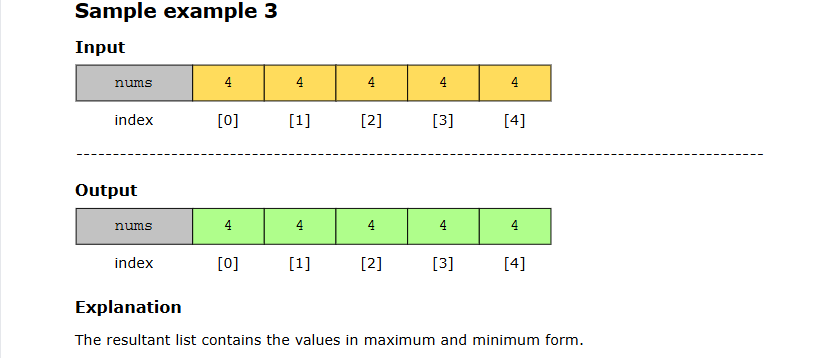

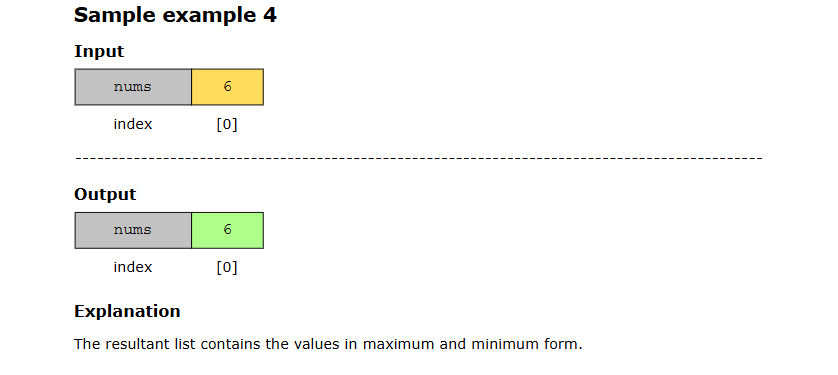

# Solution 1: Create a new list

In this solution, we start by initializing an empty list, `result`, where we populate elements from the given input list, `nums`, in a specific order before returning it. The solution involves iterating from the start of `nums` up to its midpoint, where we calculate this midpoint as such:

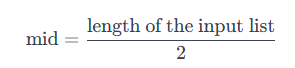

While iterating, we perform two steps:
* **Append the largest element**: The first step is appending the element from the end of `nums` that hasn’t been added to `result` yet. We do this by finding the maximum value using `nums[-(i+1)]`. This value is the largest remaining element that has not yet been appended to the `result` list.
* **Append the smallest element**: Immediately after adding the largest element, the next step is appending the current element, `nums[i]`, which represents the smallest element not yet added to `result`. This ensures that `result` contains elements in the required order.

In [1]:
def rearrange_list(nums):
    if (len(nums) == 0):
        return []    

    result = []
    mid = len(nums) // 2

    # Iterate through half of the sorted list
    for i in range(mid):
        # Append the largest remaining element (from the end of the list)
        result.append(nums[-(i+1)])
        # Append the smallest remaining element (from the start of the list)
        result.append(nums[i])

    if len(nums) % 2 == 1:
        result.append(nums[mid])

    return result


def main():
    input_list = [[1, 2, 3, 4, 5, 6, 7, 8],
				  [11, 22, 33, 44, 55, 66, 77, 88],
				  [1, 2, 4, 8, 16, 32, 64, 128, 512, 1024],
				  [3, 3, 5, 5, 7, 7, 9, 9, 11, 11, 13, 13],
				  [100, 233, 544, 753, 864, 935, 1933, 2342]]

    for i in range(len(input_list)):
        print(i + 1, ".\tOriginal list: ", input_list[i], sep='')
        print("\tRearranged list: ", rearrange_list(input_list[i]), sep='')
        print("-" * 100)


if __name__ == '__main__':
    main()

1.	Original list: [1, 2, 3, 4, 5, 6, 7, 8]
	Rearranged list: [8, 1, 7, 2, 6, 3, 5, 4]
----------------------------------------------------------------------------------------------------
2.	Original list: [11, 22, 33, 44, 55, 66, 77, 88]
	Rearranged list: [88, 11, 77, 22, 66, 33, 55, 44]
----------------------------------------------------------------------------------------------------
3.	Original list: [1, 2, 4, 8, 16, 32, 64, 128, 512, 1024]
	Rearranged list: [1024, 1, 512, 2, 128, 4, 64, 8, 32, 16]
----------------------------------------------------------------------------------------------------
4.	Original list: [3, 3, 5, 5, 7, 7, 9, 9, 11, 11, 13, 13]
	Rearranged list: [13, 3, 13, 3, 11, 5, 11, 5, 9, 7, 9, 7]
----------------------------------------------------------------------------------------------------
5.	Original list: [100, 233, 544, 753, 864, 935, 1933, 2342]
	Rearranged list: [2342, 100, 1933, 233, 935, 544, 864, 753]
--------------------------------------------------

# Solution 1: Complexity analysis

**Time complexity**: The time complexity of this solution is O(n), where n is the number of elements in the list.

**Space complexity**: The space complexity of this solution is O(1) because we used constant extra space.

# Solution 2: Use modulus (%) and two pointers

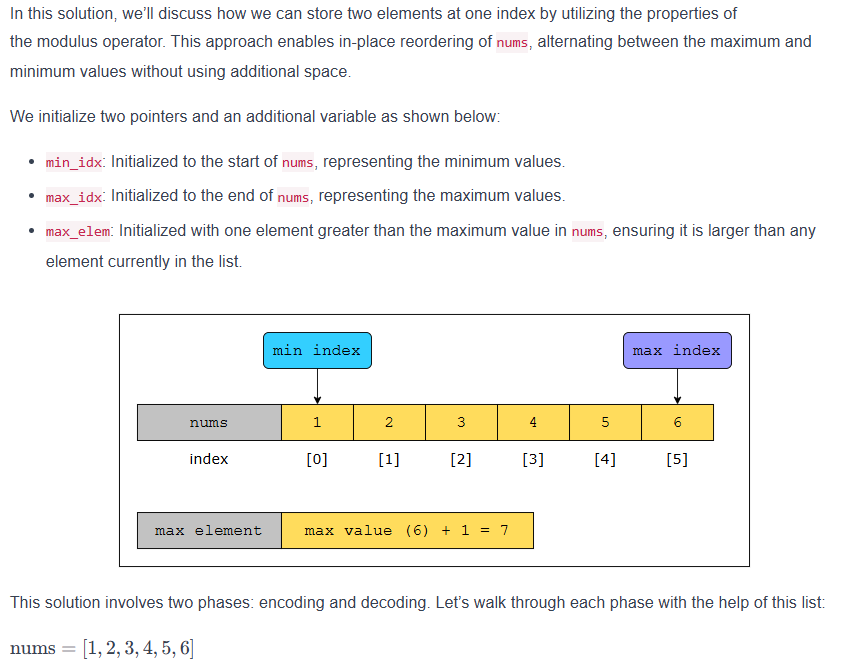

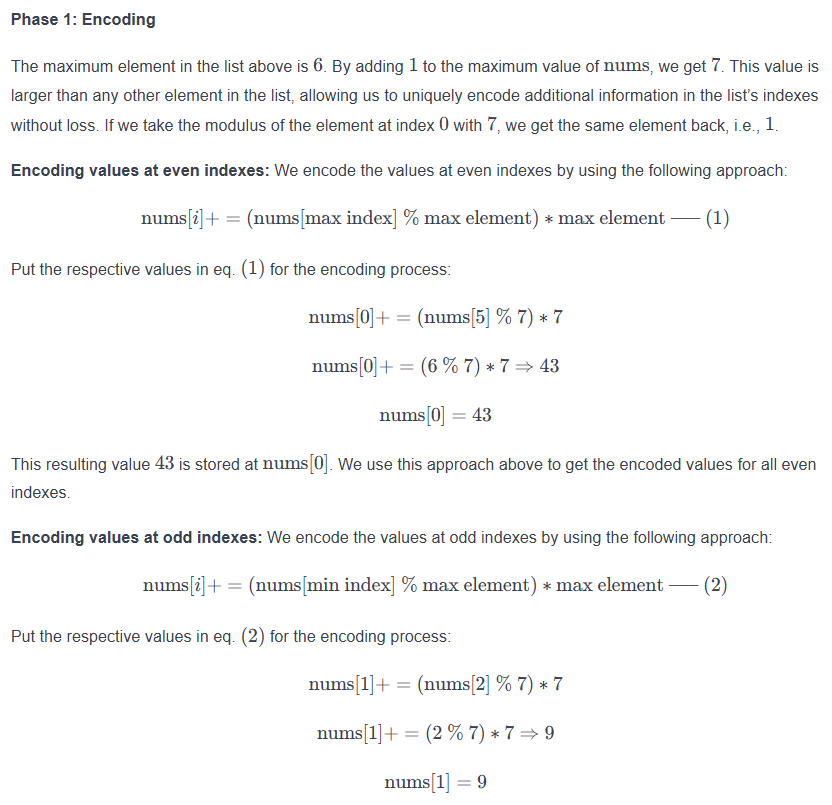

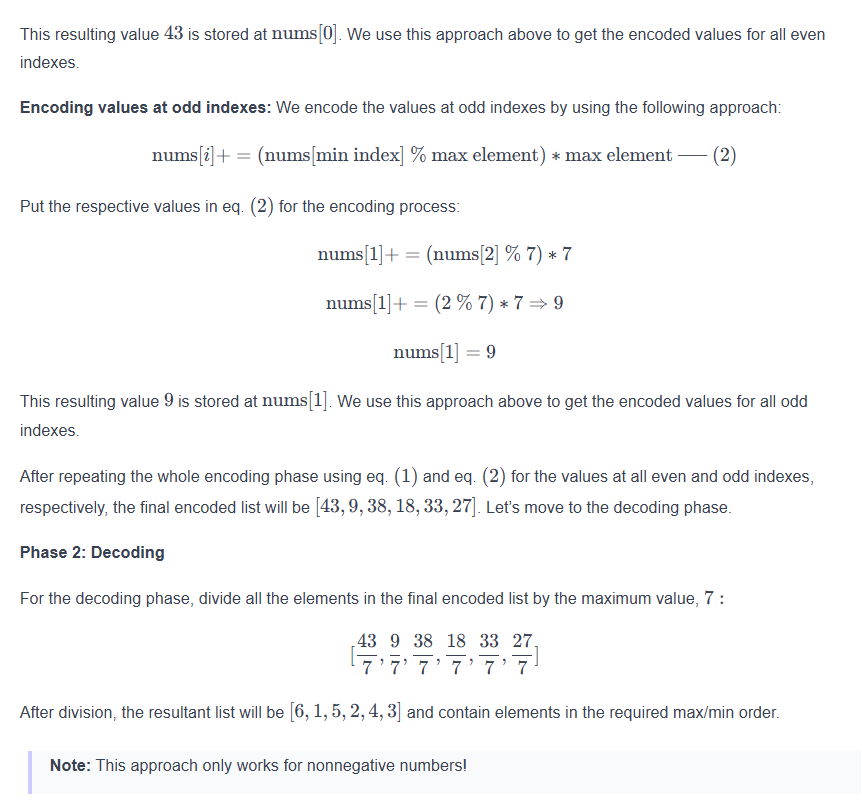

In [2]:
def rearrange_list(nums):
    if (len(nums) == 0):
        return []

    # Initialize pointers to the start and end of the list
    max_idx = len(nums) - 1
    min_idx = 0
    # Initialize a variable larger than any element in the list to use for encoding
    max_elem = nums[len(nums) - 1] + 1

    # Encoding phase
    for i in range(len(nums)):
        if i % 2 == 0:  # Encoding at even indexes
            nums[i] += (nums[max_idx] % max_elem) * max_elem
            max_idx -= 1
        else:  # Encoding at odd indexes
            nums[i] += (nums[min_idx] % max_elem) * max_elem
            min_idx += 1

    # Decoding phase
    for i in range(len(nums)):
        nums[i] = nums[i] // max_elem

    return nums


def main():
    input_list = [[1, 2, 3, 4, 5, 6, 7, 8],
				  [11, 22, 33, 44, 55, 66, 77, 88],
				  [1, 2, 4, 8, 16, 32, 64, 128, 512, 1024],
				  [3, 3, 5, 5, 7, 7, 9, 9, 11, 11, 13, 13],
				  [100, 233, 544, 753, 864, 935, 1933, 2342]]

    for i in range(len(input_list)):
        print(i + 1, ".\tOriginal list: ", input_list[i], sep='')
        print("\tRearranged list: ", rearrange_list(input_list[i]), sep='')
        print("-" * 100)


if __name__ == '__main__':
    main()

1.	Original list: [1, 2, 3, 4, 5, 6, 7, 8]
	Rearranged list: [8, 1, 7, 2, 6, 3, 5, 4]
----------------------------------------------------------------------------------------------------
2.	Original list: [11, 22, 33, 44, 55, 66, 77, 88]
	Rearranged list: [88, 11, 77, 22, 66, 33, 55, 44]
----------------------------------------------------------------------------------------------------
3.	Original list: [1, 2, 4, 8, 16, 32, 64, 128, 512, 1024]
	Rearranged list: [1024, 1, 512, 2, 128, 4, 64, 8, 32, 16]
----------------------------------------------------------------------------------------------------
4.	Original list: [3, 3, 5, 5, 7, 7, 9, 9, 11, 11, 13, 13]
	Rearranged list: [13, 3, 13, 3, 11, 5, 11, 5, 9, 7, 9, 7]
----------------------------------------------------------------------------------------------------
5.	Original list: [100, 233, 544, 753, 864, 935, 1933, 2342]
	Rearranged list: [2342, 100, 1933, 233, 935, 544, 864, 753]
--------------------------------------------------

# Solution 2: Complexity analysis

**Time complexity**: The time complexity of this solution is O(n), where n is the number of elements in the list.

**Space complexity**: The space complexity of this solution is O(1) because we used constant extra space.